### Team Project Report: Resource Allocation for Managing Auto Theft in Toronto

#### Data Selection:
##### https://data.torontopolice.on.ca/datasets/TorontoPS::auto-theft-open-data/

#### Objective

This project aims to provide initial observations that may guide Toronto Police Services in allocating resources to manage auto theft in Toronto. The focus areas include geographic prioritization, temporal resource allocation, trends over time, and a review for potential data biases


#### Broad Data Clean & Ensuring reproducibility of the report

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file from the given path
file_path = r"../data/raw/Auto_Theft_Open_Data.csv"
auto_df = pd.read_csv(file_path)

# Print the DataFrame
print(auto_df.columns)

Index(['X', 'Y', 'OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE',
       'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW',
       'REPORT_HOUR', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW',
       'OCC_HOUR', 'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE',
       'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84'],
      dtype='object')


In [3]:
# Display the first few rows of the dataset
#print(auto_df.head())

# Get summary statistics
print(auto_df.describe())


                  X             Y      OBJECTID   REPORT_YEAR    REPORT_DAY  \
count  6.363300e+04  6.363300e+04  63633.000000  63633.000000  63633.000000   
mean  -8.742175e+06  5.361075e+06  31817.000000   2020.092091     15.658966   
std    9.326877e+05  5.719657e+05  18369.409177      2.965559      8.707062   
min   -8.865400e+06  5.664924e-09      1.000000   2014.000000      1.000000   
25%   -8.852227e+06  5.415842e+06  15909.000000   2018.000000      8.000000   
50%   -8.842266e+06  5.422201e+06  31817.000000   2021.000000     16.000000   
75%   -8.831433e+06  5.428196e+06  47725.000000   2023.000000     23.000000   
max    6.327780e-09  5.442747e+06  63633.000000   2024.000000     31.000000   

         REPORT_DOY   REPORT_HOUR      OCC_YEAR       OCC_DAY       OCC_DOY  \
count  63633.000000  63633.000000  63629.000000  63629.000000  63629.000000   
mean     182.295476     11.414848   2020.078046     15.568640    182.058998   
std      105.017215      5.478690      2.975800    

In [4]:
# Check for missing values
print(auto_df.isnull().sum())

X                    0
Y                    0
OBJECTID             0
EVENT_UNIQUE_ID      0
REPORT_DATE          0
OCC_DATE             0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             4
OCC_MONTH            4
OCC_DAY              4
OCC_DOY              4
OCC_DOW              4
OCC_HOUR             0
DIVISION             0
LOCATION_TYPE        0
PREMISES_TYPE        0
UCR_CODE             0
UCR_EXT              0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64


In [5]:
# Example: Drop rows with missing values
auto_df = auto_df.dropna()
# Check for missing values
print(auto_df.isnull().sum())

X                    0
Y                    0
OBJECTID             0
EVENT_UNIQUE_ID      0
REPORT_DATE          0
OCC_DATE             0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             0
OCC_MONTH            0
OCC_DAY              0
OCC_DOY              0
OCC_DOW              0
OCC_HOUR             0
DIVISION             0
LOCATION_TYPE        0
PREMISES_TYPE        0
UCR_CODE             0
UCR_EXT              0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64


In [6]:
print(auto_df.head())

              X             Y  OBJECTID EVENT_UNIQUE_ID  \
0 -8.828387e+06  5.424471e+06         1  GO-20141263217   
1 -8.820524e+06  5.422495e+06         2  GO-20141262914   
2 -8.853205e+06  5.406668e+06         3  GO-20141262837   
3 -8.829171e+06  5.417301e+06         4  GO-20141266240   
4 -8.824733e+06  5.436635e+06         5  GO-20141266097   

              REPORT_DATE                OCC_DATE  REPORT_YEAR REPORT_MONTH  \
0  2014/01/01 05:00:00+00  2013/12/31 05:00:00+00         2014      January   
1  2014/01/01 05:00:00+00  2014/01/01 05:00:00+00         2014      January   
2  2014/01/01 05:00:00+00  2013/12/25 05:00:00+00         2014      January   
3  2014/01/02 05:00:00+00  2014/01/02 05:00:00+00         2014      January   
4  2014/01/02 05:00:00+00  2014/01/02 05:00:00+00         2014      January   

   REPORT_DAY  REPORT_DOY  ... UCR_CODE  UCR_EXT                 OFFENCE  \
0           1           1  ...     2135      210  Theft Of Motor Vehicle   
1           1     

In [7]:
# Explore values in columns with ambiguous meaning
LOCATION_TYPE = auto_df['LOCATION_TYPE'].unique()
PREMISES_TYPE_Unique = auto_df['PREMISES_TYPE'].unique()
OFFENCE_unique = auto_df['OFFENCE'].unique()
MCI_CATEGORY_unique = auto_df['MCI_CATEGORY'].unique()


print(f"list of unique types of location values", sorted(LOCATION_TYPE)) # Eliminate Column
print(f"list of unique types of premises values", sorted(PREMISES_TYPE_Unique)) # Keep Column
print(f"list of unique type of offence values", (OFFENCE_unique)) # Eliminate Column
print(f"list of unique MCI_CATEGORY values", (MCI_CATEGORY_unique)) # Eliminate Column 
# all report related items will also be eliminated
# will keep only the new neighborhood structure "NEIGHBOURHOOD_158"

list of unique types of location values ['Apartment (Rooming House, Condo)', 'Bank And Other Financial Institutions (Money Mart, Tsx)', 'Bar / Restaurant', 'Cargo Train', 'Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)', 'Community Group Home', 'Construction Site (Warehouse, Trailer, Shed)', 'Convenience Stores', 'Dealership (Car, Motorcycle, Marine, Trailer, Etc.)', 'Gas Station (Self, Full, Attached Convenience)', 'Go Station', 'Go Train', 'Group Homes (Non-Profit, Halfway House, Social Agency)', 'Homeless Shelter / Mission', 'Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)', 'Nursing Home', 'Open Areas (Lakes, Parks, Rivers)', 'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg', "Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)", 'Other Passenger Train Station', 'Other Train Tracks', 'Other Train Yard', 'Parking Lots (Apt., Commercial Or Non-Commercial)', 'Pharmacy', 'Police / Courts (Parole Board, P

In [8]:
OCC_MONTH_unique = auto_df['OCC_MONTH'].unique()
print(f"list of unique months value",(OCC_MONTH_unique))

list of unique months value ['December' 'January' 'November' 'October' 'August' 'February' 'April'
 'March' 'September' 'July' 'May' 'June']


In [9]:
# The columns identified below are not necessary for our analysis and will be dropped from the dataframe
auto_df_dropped = auto_df.drop(columns=['X', 'Y', 'OBJECTID', 'OCC_DATE', 'REPORT_DATE','EVENT_UNIQUE_ID', 'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW',
       'REPORT_HOUR','LOCATION_TYPE', 'UCR_CODE','UCR_EXT', 'OFFENCE', 'MCI_CATEGORY','HOOD_140', 'NEIGHBOURHOOD_140','HOOD_158'])

auto_df = auto_df_dropped

print(auto_df.columns)

Index(['OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'PREMISES_TYPE', 'NEIGHBOURHOOD_158', 'LONG_WGS84',
       'LAT_WGS84'],
      dtype='object')


In [10]:
print(auto_df.head())

   OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY     OCC_DOW  OCC_HOUR DIVISION  \
0    2013.0  December     31.0    365.0  Tuesday           17      D33   
1    2014.0   January      1.0      1.0  Wednesday         15      D43   
2    2013.0  December     25.0    359.0  Wednesday          0      D22   
3    2014.0   January      2.0      2.0  Thursday           9      D54   
4    2014.0   January      2.0      2.0  Thursday           1      D42   

  PREMISES_TYPE            NEIGHBOURHOOD_158  LONG_WGS84  LAT_WGS84  
0     Apartment        Victoria Village (43)  -79.306754  43.734654  
1       Outside             Cliffcrest (123)  -79.236119  43.721827  
2       Outside  Etobicoke City Centre (159)  -79.529692  43.618988  
3       Outside        Woodbine-Lumsden (60)  -79.313796  43.688101  
4         House        Agincourt North (129)  -79.273925  43.813557  


In [11]:
# List of categorical columns to encode
categorical_columns = ['OCC_MONTH', 'OCC_DOW', 'DIVISION', 'NEIGHBOURHOOD_158']

# Apply one-hot encoding
auto_df_encoded = pd.get_dummies(auto_df, columns=categorical_columns)

# Save the DataFrame to a CSV file
auto_df_encoded.to_csv('cleaned_data1.csv', index=False)

In [12]:
print(auto_df_encoded.head())

   OCC_YEAR  OCC_DAY  OCC_DOY  OCC_HOUR PREMISES_TYPE  LONG_WGS84  LAT_WGS84  \
0    2013.0     31.0    365.0        17     Apartment  -79.306754  43.734654   
1    2014.0      1.0      1.0        15       Outside  -79.236119  43.721827   
2    2013.0     25.0    359.0         0       Outside  -79.529692  43.618988   
3    2014.0      2.0      2.0         9       Outside  -79.313796  43.688101   
4    2014.0      2.0      2.0         1         House  -79.273925  43.813557   

   OCC_MONTH_April  OCC_MONTH_August  OCC_MONTH_December  ...  \
0            False             False                True  ...   
1            False             False               False  ...   
2            False             False                True  ...   
3            False             False               False  ...   
4            False             False               False  ...   

   NEIGHBOURHOOD_158_Woburn North (142)  \
0                                 False   
1                                 False   

#### Exploratory Data Analysis


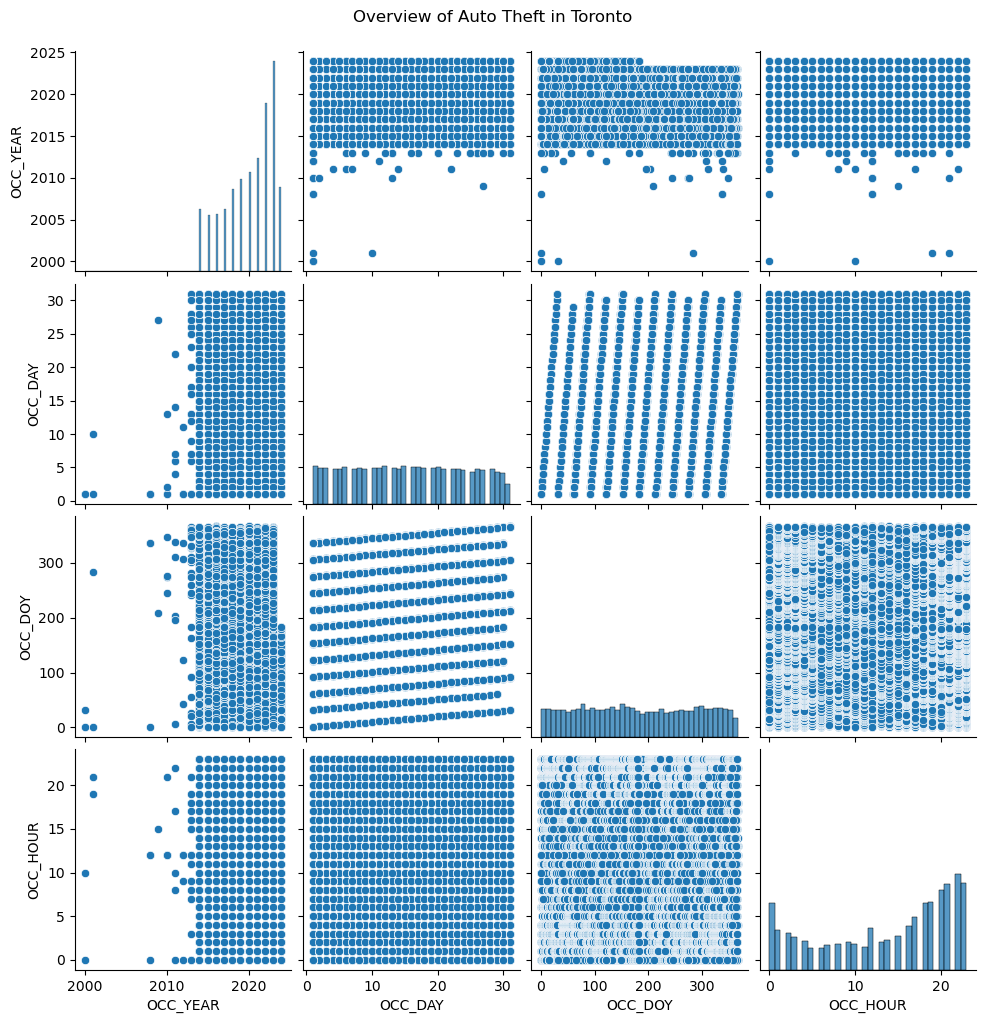

In [13]:
# Filter the necessary columns, including the three additional ones
df_filtered = auto_df[['OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'PREMISES_TYPE', 'NEIGHBOURHOOD_158' ]] #Correct column name if needed

# Plotting pairplot to visualize relationships
sns.pairplot(df_filtered)
plt.suptitle('Overview of Auto Theft in Toronto', y=1.02)
plt.show()

#### Polynomial Regression Analysis

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

data = auto_df
# Display the first few rows of the dataset to understand its structure
print("Dataset Head:")
print(data.head())
print("\nColumns in Dataset:")
print(data.columns)

# Prepare the data for regression
grouped_data = data.groupby(['OCC_DAY', 'OCC_HOUR']).size().reset_index(name='Incidents')

# Defining features (X) and target (y)
X = grouped_data[['OCC_DAY', 'OCC_HOUR']]
y = grouped_data['Incidents']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Dataset Head:
   OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY     OCC_DOW  OCC_HOUR DIVISION  \
0    2013.0  December     31.0    365.0  Tuesday           17      D33   
1    2014.0   January      1.0      1.0  Wednesday         15      D43   
2    2013.0  December     25.0    359.0  Wednesday          0      D22   
3    2014.0   January      2.0      2.0  Thursday           9      D54   
4    2014.0   January      2.0      2.0  Thursday           1      D42   

  PREMISES_TYPE            NEIGHBOURHOOD_158  LONG_WGS84  LAT_WGS84  
0     Apartment        Victoria Village (43)  -79.306754  43.734654  
1       Outside             Cliffcrest (123)  -79.236119  43.721827  
2       Outside  Etobicoke City Centre (159)  -79.529692  43.618988  
3       Outside        Woodbine-Lumsden (60)  -79.313796  43.688101  
4         House        Agincourt North (129)  -79.273925  43.813557  

Columns in Dataset:
Index(['OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'PRE

In [15]:
# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict and evaluate
y_poly_pred = poly_model.predict(X_poly_test)
poly_mse = mean_squared_error(y_test, y_poly_pred)
print(f"Polynomial Regression Mean Squared Error: {poly_mse}")

Polynomial Regression Mean Squared Error: 302.8075075503879


Polynomial features are created from the existing OCC_DAY and OCC_HOUR using a degree of 2. This allows the model to capture nonlinear relationships in the data.

An MSE of 302.81 suggests that, on average, the square of the difference between the predicted and actual number of incidents is 302.81

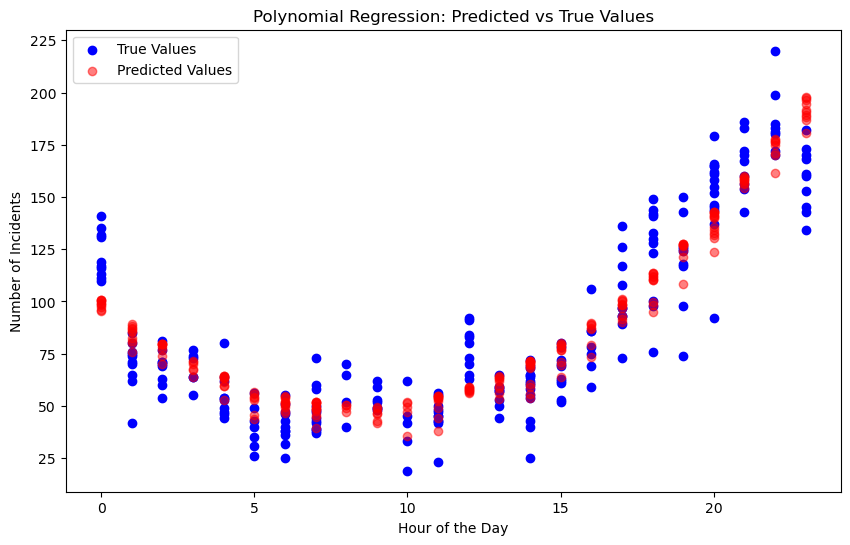

In [16]:
# Visualization: Polynomial Regression Results
plt.figure(figsize=(10, 6))

# Plot the true values
plt.scatter(X_test['OCC_HOUR'], y_test, color='blue', label='True Values')

# Plot the predicted values
plt.scatter(X_test['OCC_HOUR'], y_poly_pred, color='red', label='Predicted Values', alpha=0.5)

plt.title('Polynomial Regression: Predicted vs True Values')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

The relationship modeled by the polynomial regression shows that the frequency of auto theft incidents varies with the hour of the day in a nonlinear manner. The model effectively captures the general trend of incidents being higher during certain hours and lower during others. This relationship can help guide the allocation of police resources to times when auto theft is more likely to occur, thereby improving the efficiency and effectiveness of crime prevention efforts

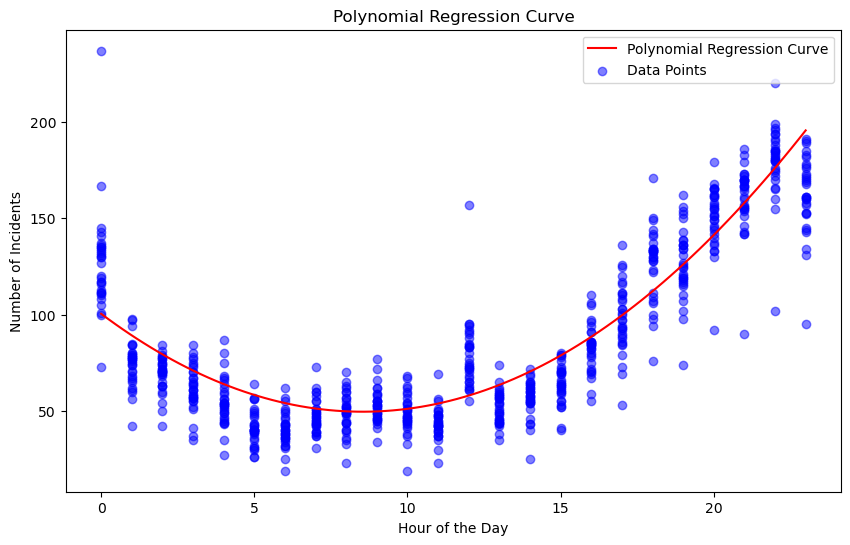

In [17]:
# Visualization: Polynomial Regression Curve
plt.figure(figsize=(10, 6))

# Create a smooth curve for visualization
X_smooth = np.linspace(X['OCC_HOUR'].min(), X['OCC_HOUR'].max(), 100).reshape(-1, 1)

# Since PolynomialFeatures was fitted with named columns, we will use DataFrame for consistency
# For the mean OCC_DAY
mean_occ_day = np.full_like(X_smooth, X['OCC_DAY'].mean())

# Combine OCC_DAY and OCC_HOUR
X_smooth_full = np.hstack((mean_occ_day, X_smooth))

# Convert it back to DataFrame with proper column names
X_smooth_full_df = pd.DataFrame(X_smooth_full, columns=['OCC_DAY', 'OCC_HOUR'])

# Transform using PolynomialFeatures
X_smooth_poly = poly.transform(X_smooth_full_df)

# Predict using the model
y_smooth_pred = poly_model.predict(X_smooth_poly)

# Plot the smooth polynomial regression curve
plt.plot(X_smooth, y_smooth_pred, color='red', label='Polynomial Regression Curve')
plt.scatter(X['OCC_HOUR'], y, color='blue', alpha=0.5, label='Data Points')

plt.title('Polynomial Regression Curve')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

Effectiveness of the Model: The polynomial regression model effectively captures the nonlinear relationship between the hour of the day and the number of incidents. It provides valuable insights into the patterns of auto theft incidents, particularly highlighting the times of day when incidents are most and least likely to occur.

Potential Improvements: While the model is effective in capturing the general trend, the scattered nature of some data points suggests that there may be other factors influencing the number of incidents that are not accounted for in this model. Further refinement, such as incorporating additional variables (e.g., day of the week, weather conditions), could improve the model's accuracy.

Analyst:

Early Morning Hours (0:00 - 6:00 AM):
The number of incidents starts relatively high around midnight and then gradually decreases through the early morning hours. This pattern suggests that auto theft is initially frequent late at night but becomes less common as the morning progresses.
The higher frequency of incidents around midnight could be attributed to fewer people being active or vigilant during these hours, making it easier for thieves to operate.

Midday Hours (6:00 AM - 12:00 PM):

The regression curve shows a downward trend, reaching its lowest point during these hours. This indicates that auto thefts are least likely to occur in the late morning and around noon.
This lower frequency might be due to increased daytime activities, with more people around, reducing opportunities for theft.

Afternoon to Evening Hours (12:00 PM - 6:00 PM):

After the midday low, the number of incidents begins to increase again in the afternoon and continues to rise into the evening.
This could be related to vehicles being parked for longer periods as people return home from work, providing more opportunities for theft.

Evening to Late Night (6:00 PM - 12:00 AM):

The curve shows a significant rise in incidents during the evening hours, peaking late at night.
This period likely represents a high-risk time for auto theft, as darkness and decreased public activity provide cover for thieves.

Peak Hours:

The hours between 6:00 PM and midnight are critical times when the likelihood of auto theft is highest. Law enforcement should consider allocating more resources, such as increased patrolling or surveillance, during these hours to deter potential thieves.

Low-Risk Hours:

The hours between 6:00 AM and 12:00 PM represent a period of lower risk for auto theft. During these times, resources might be allocated to other activities or areas requiring attention.

Conclusion:

The analysis of the hour of the day in relation to auto theft incidents highlights a clear pattern of increased risk during late-night and early-morning hours, with a significant dip during the middle of the day. This understanding is crucial for optimizing the allocation of law enforcement resources to effectively reduce the occurrence of auto theft. By focusing efforts during the identified peak hours, police services can improve their efficiency in preventing and responding to these crimes. 

#### Number of Incidents Report

In [18]:
#import plotly express library for visualization
import plotly.express as px

In [19]:
#Generate histogram to show incidents reported in each year to see yearly incident trends. Dataset used was latest updated July 23rd 2024
fig_incident_count = px.histogram(data,x="OCC_YEAR", 
                                  labels={
                                      "OCC_YEAR":"Year",
                                      "count":"Count of Occurences"
                                  },
                                  title='Auto Theft Reported Incidents by Year')
fig_incident_count.show()

In [20]:
fig_incident_premises = px.histogram(data,x="OCC_YEAR", 
                                  labels={
                                      "OCC_YEAR":"Year",
                                      "count":"Count of Occurences"
                                  },
                                  color= 'PREMISES_TYPE',
                                  title='Auto Theft Reported Incidents by Year')
fig_incident_premises.show()

We see a consistent growth in auto theft since 2017 over the years which has spiked since 2022. While the years 2022 and 2023 may become outliers the overall trend points to, without intervention, the environment has shifted to likely expect increased reported auto theft occurences since 2021. 

In [24]:
incidents_house=len(data[data['PREMISES_TYPE']=='House'])
incidents_outside=len(data[data['PREMISES_TYPE']=='Outside'])

print(f"House Incidents: {incidents_house}\nOutside Incidents {incidents_outside}")

House Incidents: 20350
Outside Incidents 33683


In [25]:
premises_distribution = data.groupby(['OCC_YEAR', 'PREMISES_TYPE']).size().reset_index(name='count')
premises_distribution['proportion'] = premises_distribution.groupby('OCC_YEAR')['count'].transform(lambda x: x / x.sum())

In [23]:
fig_trend = px.line(premises_distribution, x='OCC_YEAR', y='proportion', color='PREMISES_TYPE',
                    title='Proportion of Auto Theft by Premises Type Over Time')
fig_trend.show()

#### Observations:
**Outside vs. House:**
        
Initially, auto theft incidents were predominantly associated with houses, as shown by the green line starting near 1 (100%) around the year 2000.
Over time, the proportion of incidents at houses has significantly decreased, while the proportion of incidents occurring outside (orange line) has increased, becoming the most common premises type in recent years.

**Commercial and Other Premises:**
The blue and purple lines, representing commercial and other premises, show fluctuations but generally have a smaller share of incidents compared to houses and outside locations.

**Apartment and Transit:**
Auto theft incidents in apartments (purple line) and transit locations (cyan line) have remained relatively low and stable over time, contributing a small portion to the overall incidents.

**Educational Premises:**
The educational category (orange line) has an almost negligible proportion of auto theft incidents, indicating that schools or universities are not common locations for such crimes.